In [1]:
#Import Library

In [2]:
import os, shutil
import tensorflow as tf

In [3]:
#Dataset

In [4]:
original_dataset_dir = 'C:/Ai with python/Face Regecnation/train/train'

In [5]:
base_dir = 'C:/Ai with python/Face Regecnation/Working directory'
os.mkdir(base_dir)

In [6]:
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [7]:
#Directories for trainning, validation and testing data

In [8]:
train_Aashirs_dir = os.path.join(train_dir, 'Aashirs')
os.mkdir(train_Aashirs_dir)

train_Muneebs_dir = os.path.join(train_dir, 'Muneebs')
os.mkdir(train_Muneebs_dir)

In [9]:
validation_Aashirs_dir = os.path.join(validation_dir, 'Aashirs')
os.mkdir(validation_Aashirs_dir)

validation_Muneebs_dir = os.path.join(validation_dir, 'Muneebs')
os.mkdir(validation_Muneebs_dir)

In [10]:
test_Aashirs_dir = os.path.join(test_dir, 'Aashirs')
os.mkdir(test_Aashirs_dir)

test_Muneebs_dir = os.path.join(test_dir, 'Muneebs')
os.mkdir(test_Muneebs_dir)

In [11]:
#Aashir data

In [12]:
fnames = ['Aashir.{}.jpg'.format(i) for i in range(5,5)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(train_Aashirs_dir, fname)
  shutil.copyfile(src, dst)

In [13]:
fnames = ['Aashir.{}.jpg'.format(i) for i in range(5, 5)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(validation_Aashirs_dir, fname)
  shutil.copyfile(src, dst)

In [14]:
fnames = ['Aashir.{}.jpg'.format(i) for i in range(5, 5)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(test_Aashirs_dir, fname)
  shutil.copyfile(src, dst)

In [15]:
#Muneeb data

In [16]:
fnames = ['Muneeb.{}.jpg'.format(i) for i in range(5,5)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(train_Muneebs_dir, fname)
  shutil.copyfile(src, dst)

In [17]:
fnames = ['Muneeb.{}.jpg'.format(i) for i in range(5, 5)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(validation_Muneebs_dir, fname)
  shutil.copyfile(src, dst)

In [18]:
fnames = ['Muneeb.{}.jpg'.format(i) for i in range(5, 5)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(test_Muneebs_dir, fname)
  shutil.copyfile(src, dst)

In [19]:
#dataset status now

In [20]:
print('total training Aashir images:', len(os.listdir(train_Aashirs_dir)))

print('total training Muneeb images:', len(os.listdir(train_Muneebs_dir)))

print('total validation Aashir images:', len(os.listdir(validation_Aashirs_dir)))

print('total validation Muneeb images:', len(os.listdir(validation_Muneebs_dir)))

print('total test Aashir images:', len(os.listdir(test_Aashirs_dir)))

print('total test Muneeb images:', len(os.listdir(test_Muneebs_dir)))

total training Aashir images: 5
total training Muneeb images: 5
total validation Aashir images: 5
total validation Muneeb images: 5
total test Aashir images: 5
total test Muneeb images: 5


In [21]:
#Building Model

In [22]:
from tensorflow.keras import layers
from tensorflow.keras import models
model = models.Sequential()

#convolutional base
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

#Flatten
model.add(layers.Flatten())

#Dense classifier
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [23]:
#Summary

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [25]:
#optimizer

In [26]:
from tensorflow.keras import optimizers
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [27]:
#Data pre-processing --> ImageDataGenerator

In [28]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
#Rescaling

train_generator = train_datagen.flow_from_directory(
                  train_dir,
                  target_size=(150, 150),
                  batch_size=20,
                  class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 10 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


In [29]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (10, 150, 150, 3)
labels batch shape: (10,)


In [30]:
#fitting

In [31]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
100/100 [==============================] - 3s 14ms/step - loss: 0.7077 - acc: 0.5000 - val_loss: 0.6726 - val_acc: 0.5000


In [32]:
#model saving

In [33]:
model.save('Aashirs_and_Muneebs_small_1.h5')

In [34]:
#Plotting

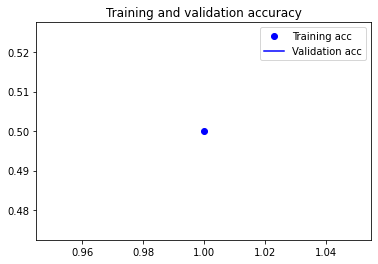

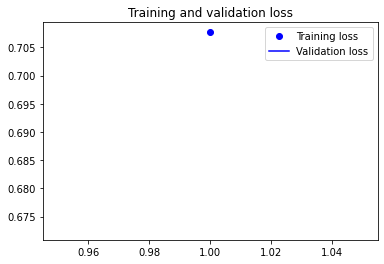

In [35]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [36]:
#Data augmentation by ImageDataGenerator

In [37]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [38]:
#Displaying some random images after augmentation

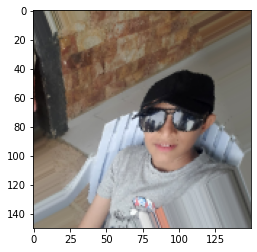

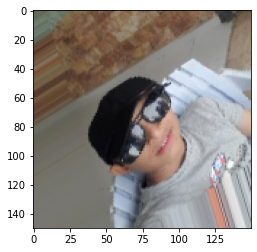

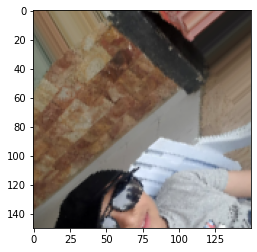

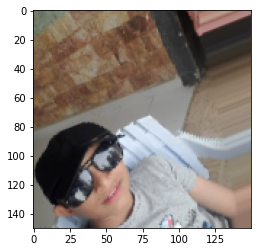

In [41]:
from keras.preprocessing import image

fnames = [os.path.join(train_Aashirs_dir, fname) for fname in os.listdir(train_Aashirs_dir)]
img_path = fnames[3]
img = image.load_img(img_path, target_size=(150, 150))

x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

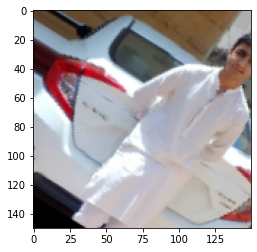

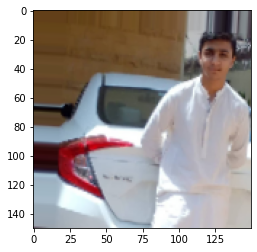

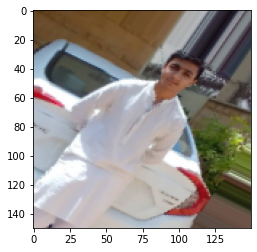

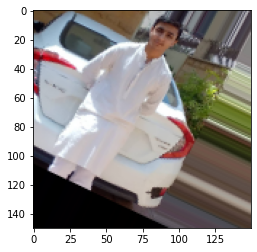

In [42]:
from keras.preprocessing import image

fnames = [os.path.join(train_Muneebs_dir, fname) for fname in os.listdir(train_Muneebs_dir)]
img_path = fnames[3]
img = image.load_img(img_path, target_size=(150, 150))

x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

In [ ]:
#New mmodel includes dropout

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [ ]:
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=1e-4),
metrics=['acc'])

In [ ]:
#Trainning using data augmentation generators

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

In [ ]:
#Fitting

In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50)

In [ ]:
#saving model 2

In [ ]:
model.save('Aashirs_and_Muneebs_small_2.h5')

In [ ]:
#Plotting

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()